In [44]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
#r3=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases 2020_2024 Unrestricted.csv")
#r1=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases 2010_2014 Unrestricted.csv")
#r2=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases 2015_2019 Unrestricted.csv")
#df =pd.concat([r1,r2,r3],axis=0)

#df.to_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")
r=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")
cons_group=[]

group=r.groupby('CT_ID_10')#['REASON']
for key,value in group:
    #print(value)
    df=pd.core.frame.DataFrame(value)
    total=df.shape[0]
    #print(df.keys())
    most_key=df["REASON"].value_counts().idxmax()
    most=df["REASON"].value_counts()[df["REASON"].value_counts().idxmax()]
    ratio = most/total
    if not df["BRA_PD"][0]:
        name=''
    else:
      name=df["BRA_PD"][0]
    cons=[key,total,most_key,most,ratio,name]
    cons_group.append(cons)
ratio_group=sorted(cons_group,key=(lambda x:x[4]),reverse=True)
most_group=sorted(cons_group,key=(lambda x:x[3]),reverse=True)

<ipython-input-44-aed82eafe66e>:11: DtypeWarning: Columns (17,18,29) have mixed types. Specify dtype option on import or set low_memory=False.
  r=pd.read_csv("/content/drive/MyDrive/311 cases/311 Cases.csv")


KeyError: ignored

[[25025030300.0, 41620, 'General Request', 9652, 0.23190773666506487], [25025020200.0, 29618, 'Street Cleaning', 8350, 0.281923154838274], [25025060501.0, 30755, 'Enforcement & Abandoned Vehicles', 8025, 0.2609331815964884], [25025070101.0, 39018, 'General Request', 7124, 0.18258239786765082], [25025060101.0, 21351, 'Enforcement & Abandoned Vehicles', 6918, 0.3240129267949979], [25025060400.0, 28960, 'Enforcement & Abandoned Vehicles', 6784, 0.23425414364640884], [25025071101.0, 28122, 'Needle Program', 6128, 0.2179076879311571], [25025140400.0, 25136, 'Sanitation', 5969, 0.23746817313812857], [25025130100.0, 22319, 'Sanitation', 5923, 0.2653792732649312], [25025070300.0, 36366, 'General Request', 5660, 0.1556398834075785]]


<Figure size 432x288 with 0 Axes>

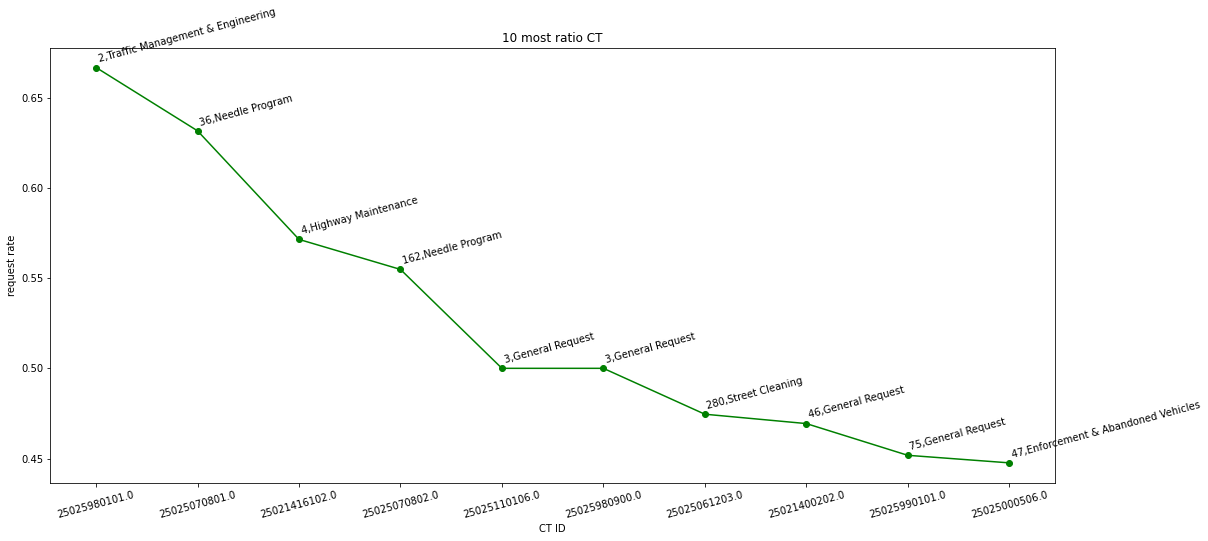

In [29]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(18,8))
plt_CTID=[x[0] for x in ratio_group[:10]] #if x[1]>=500]#CT_ID
plt_total=[x[1] for x in ratio_group[:10]] # if x[1]>=500]#所有request数
plt_most_key=[x[2] for x in ratio_group[:10]] # if x[1]>=500]#最多的request
plt_most=[x[3] for x in ratio_group[:10]] # if x[1]>=500]#最多request的数量
plt_ratio=[x[4] for x in ratio_group[:10]] # if x[1]>=500]#最多request占比
i=range(10)
plt.plot(i, plt_ratio, color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('10 most ratio CT')
#plt.legend()
plt.xticks(i,plt_CTID,rotation=15)
for i in range (10):
    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_most[i],'.0f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_ratio_all.png")

#plt.figure(2)


#print(np.array(group))


[[25025030300.0, 41620, 'General Request', 9652, 0.23190773666506487], [25025020200.0, 29618, 'Street Cleaning', 8350, 0.281923154838274], [25025060501.0, 30755, 'Enforcement & Abandoned Vehicles', 8025, 0.2609331815964884], [25025070101.0, 39018, 'General Request', 7124, 0.18258239786765082], [25025060101.0, 21351, 'Enforcement & Abandoned Vehicles', 6918, 0.3240129267949979], [25025060400.0, 28960, 'Enforcement & Abandoned Vehicles', 6784, 0.23425414364640884], [25025071101.0, 28122, 'Needle Program', 6128, 0.2179076879311571], [25025140400.0, 25136, 'Sanitation', 5969, 0.23746817313812857], [25025130100.0, 22319, 'Sanitation', 5923, 0.2653792732649312], [25025070300.0, 36366, 'General Request', 5660, 0.1556398834075785]]


<Figure size 432x288 with 0 Axes>

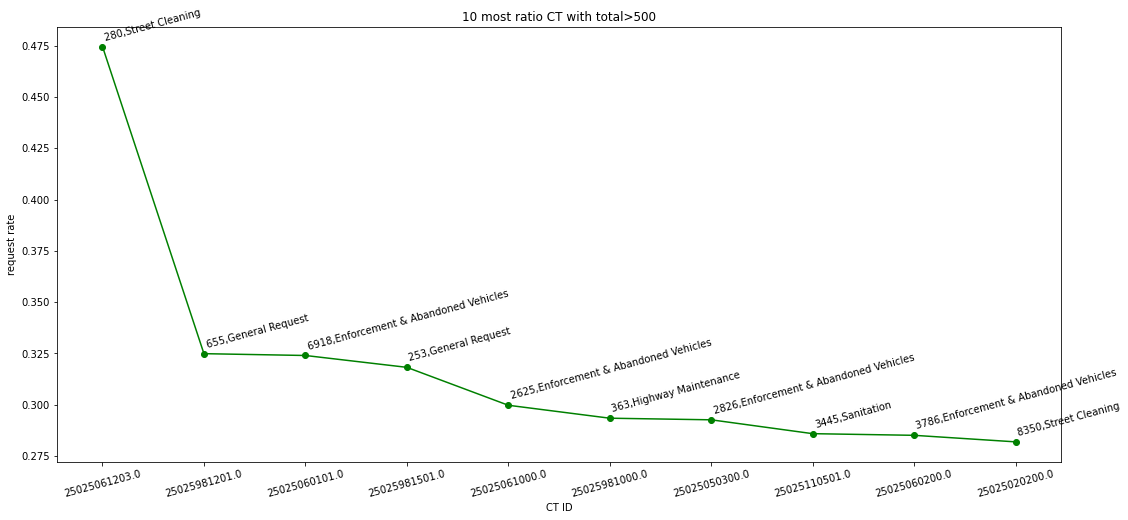

In [30]:
print(most_group[:10])
plt.figure(1)
fig = plt.figure(figsize=(18,8))
plt_CTID=[x[0] for x in ratio_group if x[1]>=200]#CT_ID
plt_total=[x[1] for x in ratio_group if x[1]>=200]#所有request数
plt_most_key=[x[2] for x in ratio_group if x[1]>=200]#最多的request
plt_most=[x[3] for x in ratio_group if x[1]>=200]#最多request的数量
plt_ratio=[x[4] for x in ratio_group if x[1]>=200]#最多request占比
i=range(10)
plt.plot(i, plt_ratio[:10], color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
plt.title('10 most ratio CT with total>500')
#plt.legend()
plt.xticks(i,plt_CTID[:10],rotation=15)
for i in range (10):
    plt.text(i+0.01,plt_ratio[i]+0.003,str(format(plt_most[i],'.0f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('CT ID')
plt.ylabel('request rate')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/1_b_ratio_select.png")

[[25025030300.0, 41620, 'General Request', 9652, 0.23190773666506487], [25025020200.0, 29618, 'Street Cleaning', 8350, 0.281923154838274], [25025060501.0, 30755, 'Enforcement & Abandoned Vehicles', 8025, 0.2609331815964884], [25025070101.0, 39018, 'General Request', 7124, 0.18258239786765082], [25025060101.0, 21351, 'Enforcement & Abandoned Vehicles', 6918, 0.3240129267949979], [25025060400.0, 28960, 'Enforcement & Abandoned Vehicles', 6784, 0.23425414364640884], [25025071101.0, 28122, 'Needle Program', 6128, 0.2179076879311571], [25025140400.0, 25136, 'Sanitation', 5969, 0.23746817313812857], [25025130100.0, 22319, 'Sanitation', 5923, 0.2653792732649312], [25025070300.0, 36366, 'General Request', 5660, 0.1556398834075785]]
[[25025980700.0, 1110, 'General Request', 210, 0.1891891891891892], [25025030302.0, 901, 'General Request', 184, 0.20421753607103219], [25025981501.0, 795, 'General Request', 253, 0.3182389937106918], [25025070104.0, 652, 'General Request', 158, 0.24233128834355827]

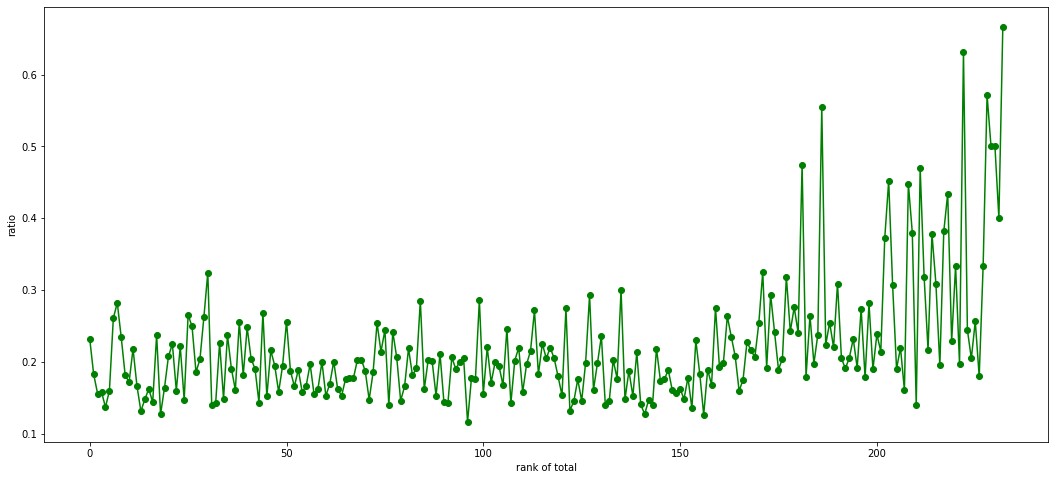

<Figure size 432x288 with 0 Axes>

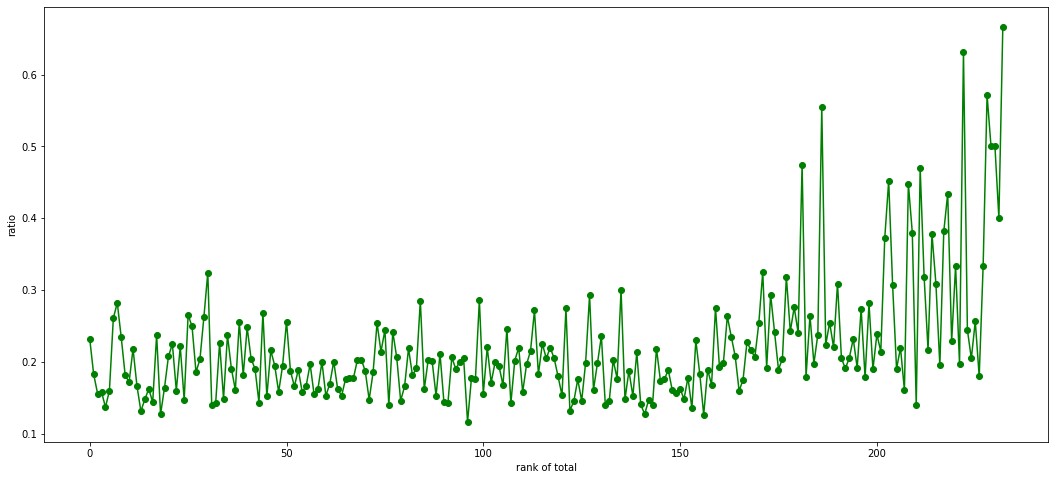

In [40]:
print(most_group[:10])
total_group=sorted(cons_group,key=(lambda x:x[1]),reverse=True)
print(total_group[175:200])
plt.figure(1)
fig = plt.figure(figsize=(18,8))
#plt_CTID=[x[0] for x in most_group] #if x[1]>=500]#CT_ID
#plt_total=[x[1] for x in total_group] # if x[1]>=500]#所有request数
#plt_most_key=[x[2] for x in most_group] # if x[1]>=500]#最多的request
#plt_most=[x[3] for x in most_group] # if x[1]>=500]#最多request的数量
plt_ratio=[x[4] for x in total_group] # if x[1]>=500]#最多request占比
i=range(len(plt_ratio))
plt.plot(i, plt_ratio, color='green', marker='o', linestyle='solid')
#plt.plot(year, profit, color='blue', marker='s', linestyle='dashed')
#plt.title('10 most nums CT')
#plt.legend()
#plt.xticks(i,plt_total,rotation=15)
#for i in range (10):
#    plt.text(i+0.01,plt_most[i]+50,str(format(plt_ratio[i],'.3f'))+','+str(plt_most_key[i]),rotation=15)
plt.xlabel('rank of total')
plt.ylabel('ratio')
#plt.show()
plt.savefig("/content/drive/MyDrive/sparkfigs/total_ratio.png")

plt.figure(2)


#print(np.array(group))

In [ ]:
l=pd.read_csv("/content/drive/MyDrive/Climate_Ready_Boston_Social_Vulnerability.csv")
